# Target Variable
Bevor wir uns die Features genauer ansehen werfen wir zunächst einen Blick auf die Zielvariable, also diejenigen Werte, die wir vorhersagen wollen.
[Credits to Serigne](https://www.kaggle.com/serigne)
[Angelehnt an die Quelle von Serigne bei kaggle](https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard/notebook)

In [25]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "../data/house-prices-advanced-regression-techniques"]).decode("utf8")) #check the files available in the directory

import pickle

data_description.txt
test.csv
test.pkl
train.csv
train.pkl


In [26]:
train = pd.read_csv('../data/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../data/house-prices-advanced-regression-techniques/test.csv')


# Überprüfung Normalverteilung
Viele ML Algorithmen bevorzugen normalverteilte Daten (bei einer Regression).

Daher soll hier zunächst die Verteilung der Ziel-Variablen - d.h. der zu erzielenden Verkaufspreise betrachtet werden:


 mu = 180921.20 and sigma = 79415.29


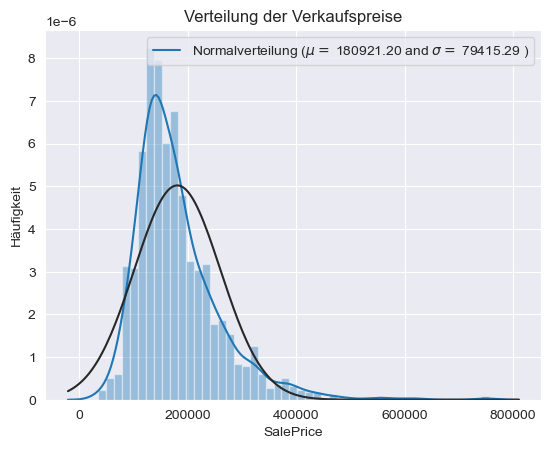

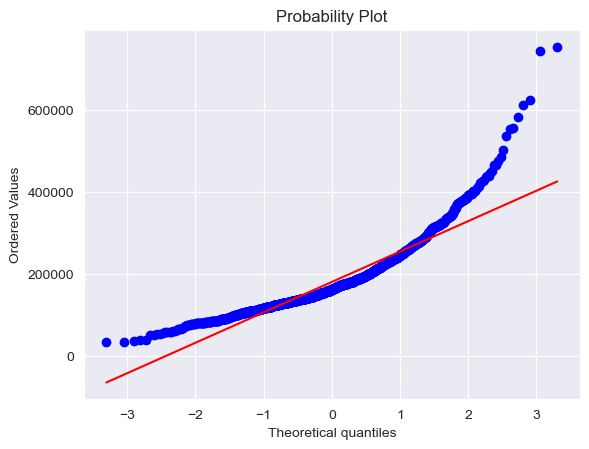

In [27]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normalverteilung ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Verkaufspreise')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# Herstellung der Normalverteilung


 mu = 12.02 and sigma = 0.40


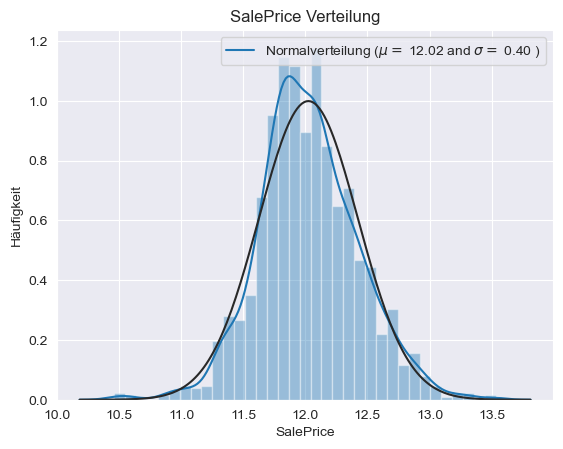

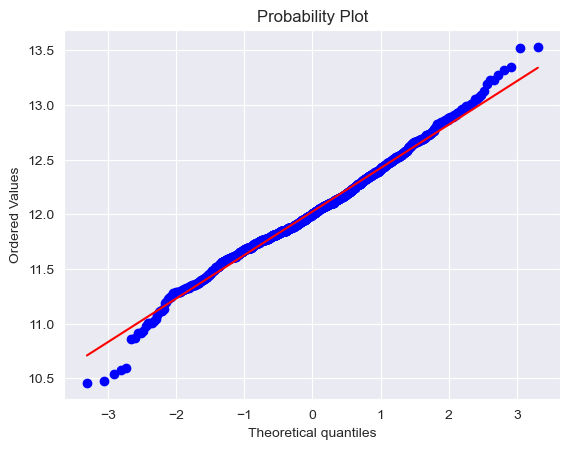

In [28]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normalverteilung ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Häufigkeit')
plt.title('SalePrice Verteilung')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# Sichern der Zwischenergebnisse

In [31]:
with open('../data/house-prices-advanced-regression-techniques/train.pkl', 'wb') as handle:
    pickle.dump(train, handle)
with open('../data/house-prices-advanced-regression-techniques/test.pkl', 'wb') as handle:
    pickle.dump(test, handle)